<a href="https://colab.research.google.com/github/arhamk15/physics-projects/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# import required modules
import zipfile
import pandas as pd

# read the dataset using the compression zip
data = pd.read_csv('archive (7).zip',compression='zip')
data.dropna(axis = 0)

data = data.drop(['Name', 'Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis = 1)
data.replace("NaN", np.nan, inplace=True)
data.dropna(inplace=True)

data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


# Preprocessing data

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd


le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'].values)

data = pd.DataFrame(data)

# Separate features and target
y = data.iloc[:,0].values
X = data.iloc[:,1:].values

'''
# Impute missing values in 'Age' with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)'''

sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns = data.columns[1:])
y = pd.DataFrame(y, columns = ['Survived'])
X


,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.911232,0.759051,-0.530377,0.524570,-0.505895,-0.518978
1,-1.476364,-1.317434,0.571831,0.524570,-0.505895,0.691897
2,0.911232,-1.317434,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.476364,-1.317434,0.365167,0.524570,-0.505895,0.348049
4,0.911232,0.759051,0.365167,-0.551703,-0.505895,-0.503850
...,...,...,...,...,...,...
709,0.911232,-1.317434,0.640719,-0.551703,5.357890,-0.105320
710,-0.282566,0.759051,-0.185937,-0.551703,-0.505895,-0.410245
711,-1.476364,-1.317434,-0.737041,-0.551703,-0.505895,-0.088774
712,-1.476364,0.759051,-0.254825,-0.551703,-0.505895,-0.088774


# Data visualisation

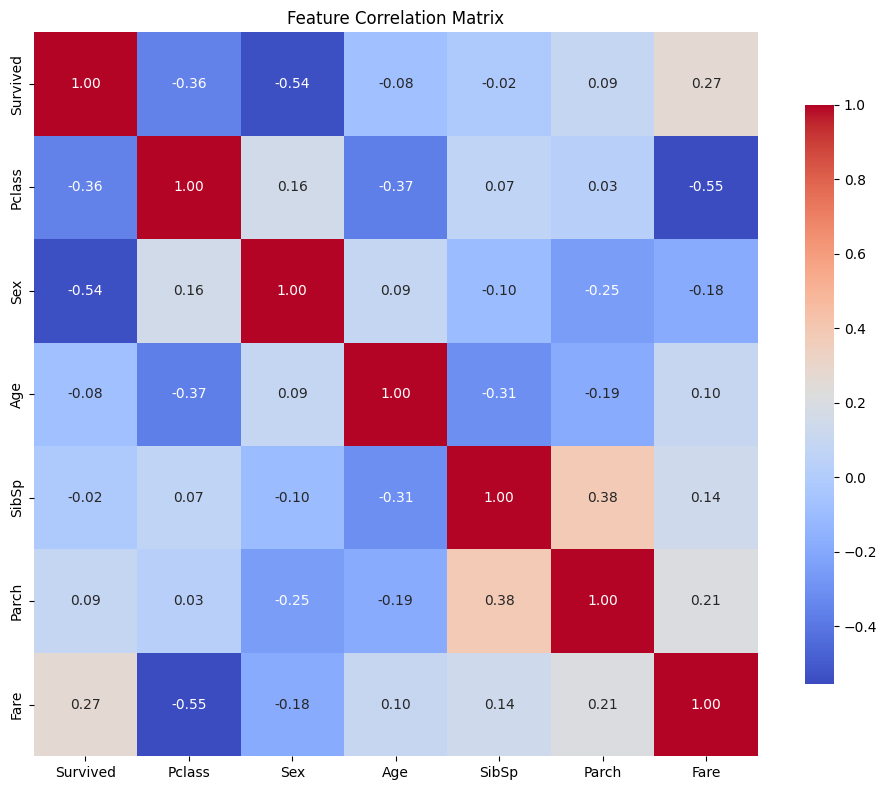

In [4]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Data training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


classifiers =[ RandomForestClassifier(random_state = 0), SVC(random_state = 0), KNeighborsClassifier(), DecisionTreeClassifier(random_state = 0), GaussianNB()]

for classifer in classifiers:
    classifer.fit(X_train, y_train)
    y_pred = classifer.predict(X_test)
    print(classifer.__class__.__name__, classifer.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.7762237762237763
SVC 0.8041958041958042
KNeighborsClassifier 0.7622377622377622
DecisionTreeClassifier 0.7692307692307693
GaussianNB 0.7622377622377622


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


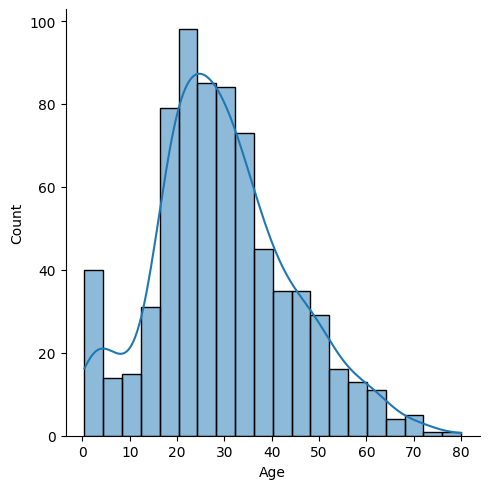

In [11]:
sns.displot(data['Age'], kde=True)
plt.show()